#### SCOTv1 performance on ambiguous datasets

In [1]:
import yaml
import os
from sklearn.preprocessing import normalize
from types import SimpleNamespace

import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))
from run_baselines.scot import scotv1
from run_baselines.scot import scotv2
from run_baselines.run_mmdma import mmdma_case
from run_baselines.unioncom import UnionCom
from pamona import Pamona
from utils.utils import *
from utils.vis import *
%matplotlib inline

Running on cpu


In [2]:
# load parameters and datasets
with open("../cfgs/scNMT.yaml", "r") as file:
        params = yaml.safe_load(file)
params = SimpleNamespace(**params)

data_url1 = os.path.join('..', params.data_path, params.data_url1)
data_url2 = os.path.join('..', params.data_path, params.data_url2)
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join('..', params.data_path, params.label_url1)
label_url2 = os.path.join('..', params.data_path, params.label_url2)
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

if params.norm: 
        data1 = normalize(data1, norm=params.norm)
        data2 = normalize(data2, norm=params.norm)

if params.sort_label: 
        data1, label1, _ = sorted_by_label(data1, label1)
        data2, label2, _ = sorted_by_label(data2, label2)

data size: data1 = (612, 300), data2 = (709, 300)


#### 1. SCOT v1

It.  |Err         
-------------------
    0|1.429656e-03|
   10|9.456000e-04|
   20|1.218894e-04|
   30|1.011103e-04|
   40|8.432593e-05|
   50|7.035454e-05|
   60|5.864088e-05|
   70|4.899508e-05|
   80|4.111509e-05|
   90|3.460438e-05|
  100|2.912853e-05|
  110|2.445954e-05|
  120|2.045437e-05|
  130|1.702100e-05|
  140|1.409248e-05|
  150|1.161221e-05|
  160|9.527532e-06|
  170|7.788095e-06|
  180|6.346181e-06|
  190|5.157627e-06|
It.  |Err         
-------------------
  200|4.182563e-06|
  210|3.385792e-06|
  220|2.736820e-06|
  230|2.209625e-06|
  240|1.782277e-06|
  250|1.436465e-06|
  260|1.157027e-06|
  270|9.314793e-07|
  280|7.495942e-07|
  290|6.030276e-07|
  300|4.849911e-07|
  310|3.899764e-07|
  320|3.135226e-07|
  330|2.520228e-07|
  340|2.025644e-07|
  350|1.627975e-07|
  360|1.308283e-07|
  370|1.051309e-07|
  380|8.447721e-08|
  390|6.787854e-08|
It.  |Err         
-------------------
  400|5.453968e-08|
  410|4.382100e-08|
  420|3.520819e-08|
  430|2.828775e-08|
  4

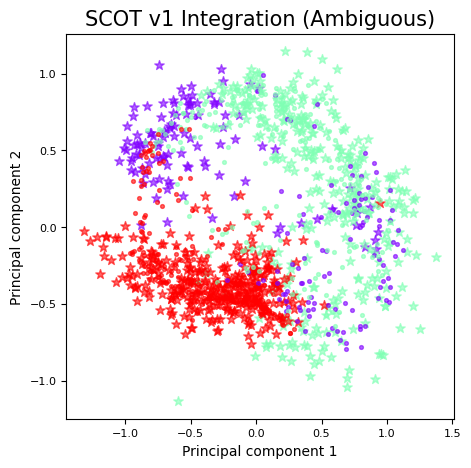

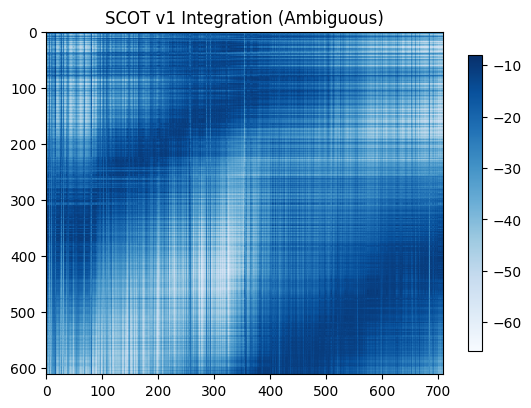

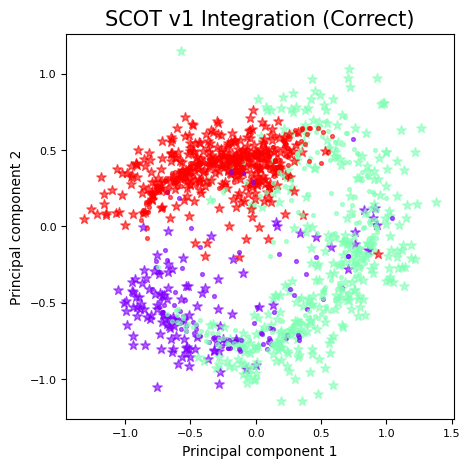

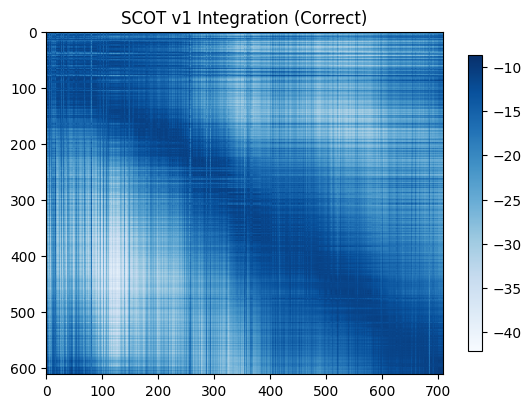

In [3]:
# Ambiguous solution
scot_instance1 = scotv1.SCOT(data1, data2)
X_aligned_case1, y_aligned_case1 = scot_instance1.align(k=120, e=0.005, mode='distance', metric='euclidean', normalize=False)

# Correct solution
scot_instance2 = scotv1.SCOT(data1, data2)
X_aligned_case2, y_aligned_case2 = scot_instance2.align(k=25, e=0.01, mode='distance', metric='euclidean', normalize=False)

plt_mapping_by_labels(X_aligned_case1, y_aligned_case1, label1, label2, title = "SCOT v1 Integration (Ambiguous)", a = 0.6, show=True)  
plt_heatmap(np.log(scot_instance1.coupling), title="SCOT v1 Integration (Ambiguous)", show=True)
plt_mapping_by_labels(X_aligned_case2, y_aligned_case2, label1, label2, title = "SCOT v1 Integration (Correct)", a = 0.6, show=True)  
plt_heatmap(np.log(scot_instance2.coupling), title="SCOT v1 Integration (Correct)", show=True)

#### 2. SCOT v2

computing intra-domain graph distances
running pairwise dataset alignments
Unbalanced GW step: 0
Unbalanced GW step: 10
Unbalanced GW step: 20
FLAGS [True]
Projection Method embedding
computing intra-domain graph distances
running pairwise dataset alignments
Unbalanced GW step: 0
Unbalanced GW step: 10
FLAGS [True]
Projection Method embedding


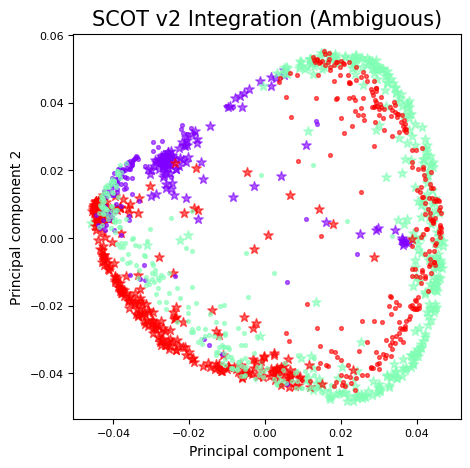

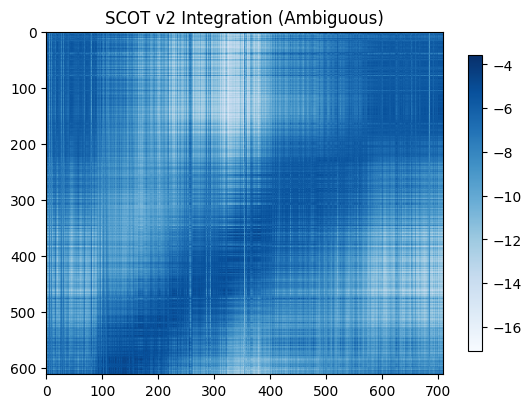

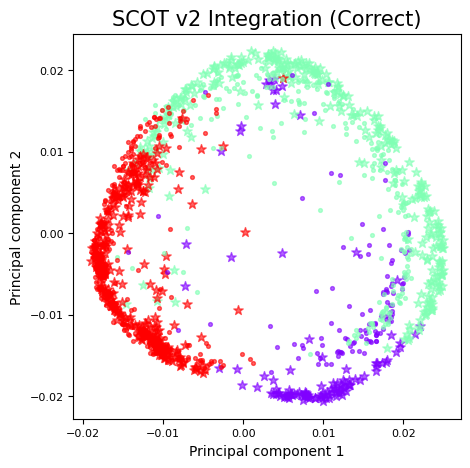

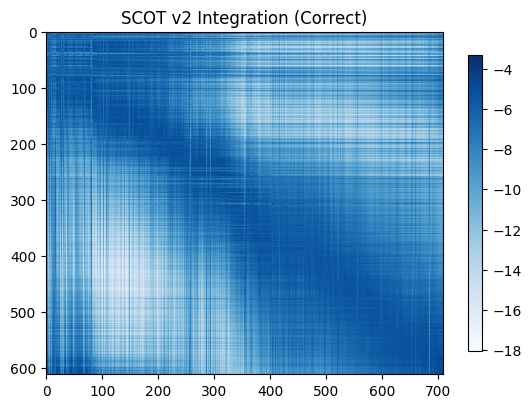

In [4]:
# Ambiguous case
scot_instance1 = scotv2.SCOTv2([data1, data2])
integrated_data_case1 = scot_instance1.align(k=20, eps=0.01, rho=0.1,  mode='connectivity', metric='correlation', normalize=False)

# Correct case
scot_instance2 = scotv2.SCOTv2([data1, data2])
integrated_data_case2 = scot_instance2.align(k=75, eps=0.01, rho=0.1, mode='distance', metric='euclidean', normalize=False)

plt_mapping_by_labels(integrated_data_case1[0], integrated_data_case1[1], label1, label2, title = "SCOT v2 Integration (Ambiguous)", a = 0.6, show=True)  
plt_heatmap(np.log(scot_instance1.couplings[0]), title="SCOT v2 Integration (Ambiguous)", show=True)
plt_mapping_by_labels(integrated_data_case2[0], integrated_data_case2[1], label1, label2, title = "SCOT v2 Integration (Correct)", a = 0.6, show=True)  
plt_heatmap(np.log(scot_instance2.couplings[0]), title="SCOT v2 Integration (Correct)", show=True)

#### 3. MMDMA

Number of dimensions of latent space... 4
Calculated sigma: 8.645069591421134


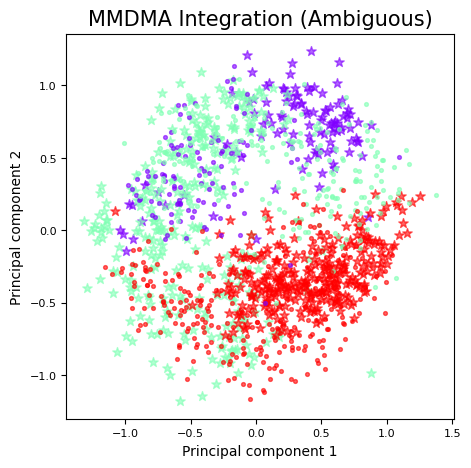

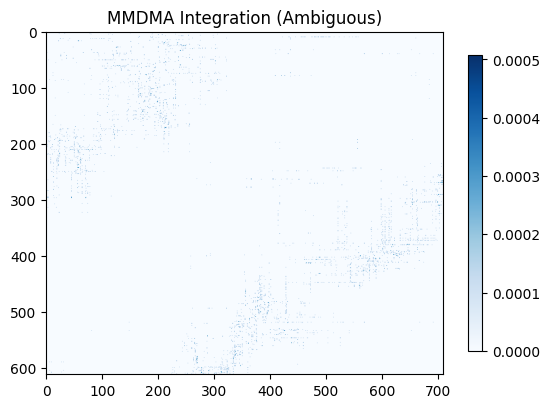

In [8]:
# Ambiguous case
data1_new_case1, data2_new_case1, mapping_case1 = mmdma_case(data1, data2, lambda1=1e-5, lambda2=1e-6, seed=0, epoch=5000, sigma=0.0, nfeat=4, kernel="linear")
plt_mapping_by_labels(data1_new_case1, data2_new_case1, label1, label2, title = "MMDMA Integration (Ambiguous)", a = 0.6, show=True)  
plt_heatmap(mapping_case1, title="MMDMA Integration (Ambiguous)", show=True)


Number of dimensions of latent space... 4
Calculated sigma: 5.5875878667757775


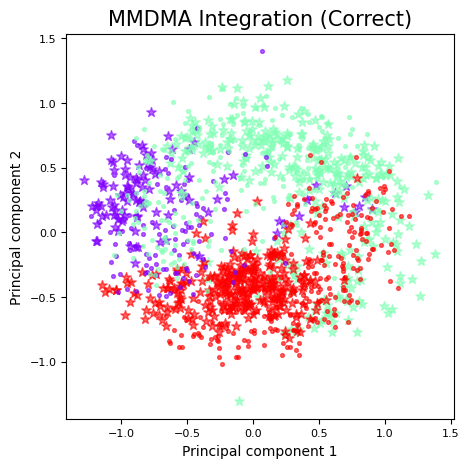

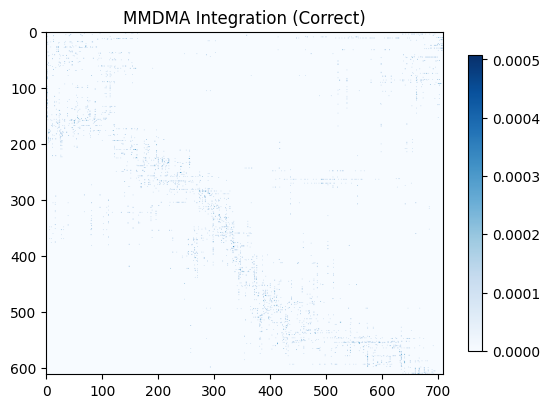

In [10]:
# Correct case
data1_new_case2, data2_new_case2, mapping_case2 = mmdma_case(data1, data2, lambda1=1e-5, lambda2=1e-6, seed=1, epoch=5000, sigma=0.0, nfeat=4, kernel="linear")
plt_mapping_by_labels(data1_new_case2, data2_new_case2, label1, label2, title = "MMDMA Integration (Correct)", a = 0.6, show=True)  
plt_heatmap(mapping_case2, title="MMDMA Integration (Correct)", show=True)

#### 4. Pamona

Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|4.420390e-04|
   10|2.257426e-04|
   20|4.939515e-05|
   30|5.132185e-05|
   40|2.523055e-05|
   50|9.588519e-06|
   60|3.449626e-06|
   70|1.225448e-06|
   80|4.337794e-07|
   90|1.533719e-07|
  100|5.420674e-08|
  110|1.915586e-08|
  120|6.769075e-09|
  130|2.391937e-09|
  140|8.452154e-10|
Pamona Done! takes 12.018856 seconds
Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|1.862343e-03|
   10|9.637336e-04|
   20|5.283266e-04|
   30|1.115695e-04|
   40|2.134101e-05|
   50|4.073531e-06|
   60|7.786607e-07|
   70|1.489463e-07|
   80|2.849781e-08|
   90|5.452837e-09|
  100|1.043377e-09|
  110|1.996466e-10|
Pamona Done! takes 46.389051 seconds


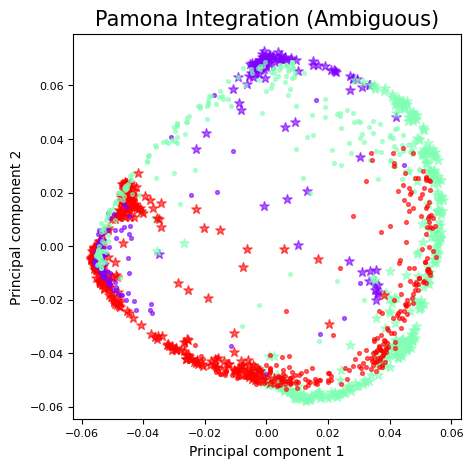

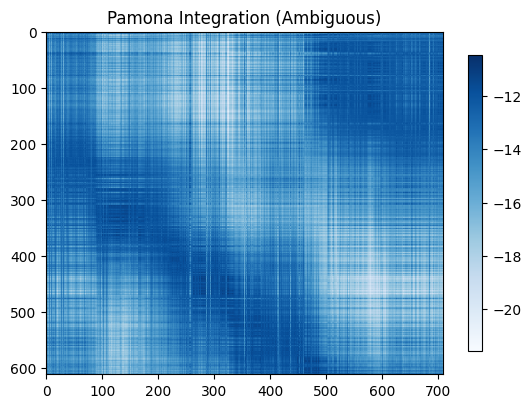

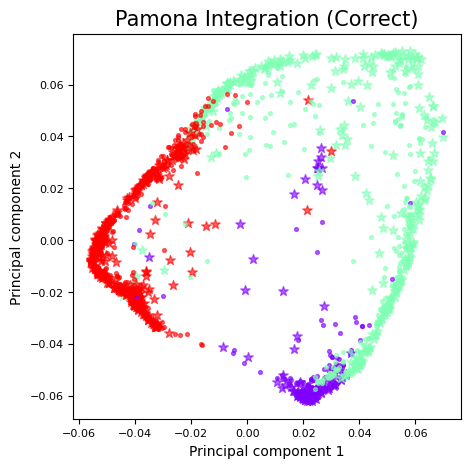

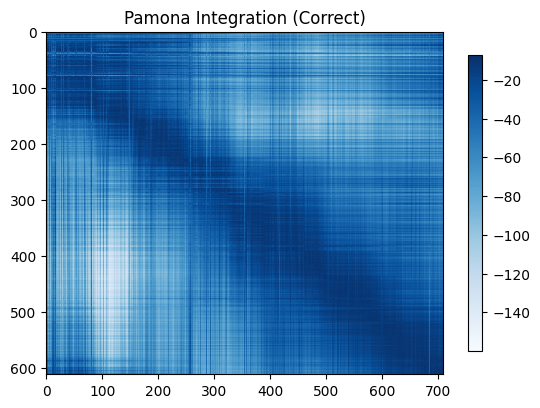

In [13]:
# Ambiguous case
pa1 = Pamona.Pamona(epsilon=0.01, Lambda=1.0, n_neighbors=7, n_shared=None, mode='connectivity', metric='correlation')
integrated_data_case1, mapping_case1 = pa1.run_Pamona([data1, data2])
# remove virtual cell in pamona
mapping_case1 = mapping_case1[0][:-1, :][:, :-1]

# Correct case
pa2 = Pamona.Pamona(epsilon=0.001, Lambda=1.0, n_neighbors=6, n_shared=None)
integrated_data_case2, mapping_case2 = pa2.run_Pamona([data1, data2])
# remove virtual cell in pamona
mapping_case2 = mapping_case2[0][:-1, :][:, :-1]

plt_mapping_by_labels(integrated_data_case1[0], integrated_data_case1[1], label1, label2, title = "Pamona Integration (Ambiguous)", a = 0.6, show=True)  
plt_heatmap(np.log(mapping_case1), title="Pamona Integration (Ambiguous)", show=True)
plt_mapping_by_labels(integrated_data_case2[0], integrated_data_case2[1], label1, label2, title = "Pamona Integration (Correct)", a = 0.6, show=True) 
plt_heatmap(np.log(mapping_case2), title="Pamona Integration (Correct)", show=True) 

#### 5. UnionCom

use random seed: 666
Shape of Raw data
Dataset 0: (612, 300)
Final k = 5
Dataset 1: (709, 300)
Final k = 5
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[1000/10000] err:0.9242 alpha:1.5732
epoch:[2000/10000] err:0.7105 alpha:1.7864
epoch:[3000/10000] err:0.4767 alpha:1.8298
epoch:[4000/10000] err:0.4249 alpha:1.8440
epoch:[5000/10000] err:0.3977 alpha:1.8510
epoch:[6000/10000] err:0.3798 alpha:1.8552
epoch:[7000/10000] err:0.3666 alpha:1.8580
epoch:[8000/10000] err:0.3563 alpha:1.8600
epoch:[9000/10000] err:0.3480 alpha:1.8616
epoch:[10000/10000] err:0.3412 alpha:1.8628
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[10/100]: loss:2.427568, align_loss:0.179614
epoch:[20/100]: loss:2.010812, align_loss:0.186518
epoch:[30/100]: loss:2.233704, align_loss:0.197179
epoch:[40/100]: loss:2.302572, align_loss:0.194477
epoch:[50/100]: loss:1.917958, align_loss:0.196242
epoch:[60/100]: los

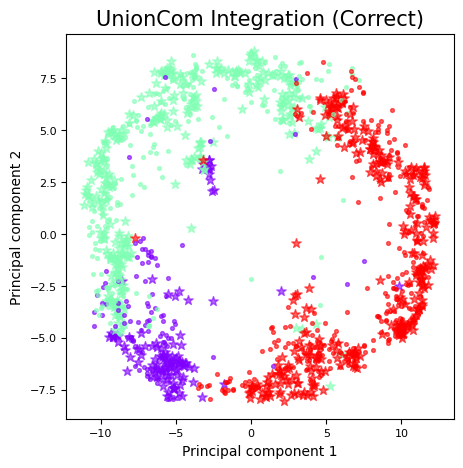

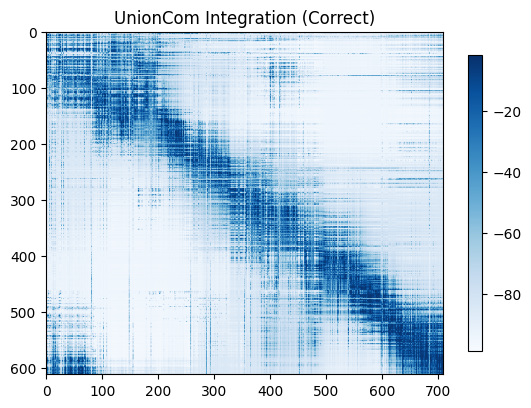

In [16]:
# Correct case
uc = UnionCom.UnionCom(rho=1, kmin=5, epoch_pd=10000, epsilon=0.01, log_pd=1000)
integrated_data_case2, mapping_case2 = uc.fit_transform(dataset=[data1,data2])

plt_mapping_by_labels(integrated_data_case2[0], integrated_data_case2[1], label1, label2, title = "UnionCom Integration (Correct)", a = 0.6, show=True)  
plt_heatmap(np.log(mapping_case2[0]), title="UnionCom Integration (Correct)", show=True) 